Processamento de arquivos Strava

Os dados foram obtidos conforme descrito do link:
https://www.reddit.com/r/Strava/comments/176n952/is_it_possible_to_export_all_activity_data_in_a/

Usei o método de entrar no link https://www.strava.com/athlete/delete_your_account mas não deletei a conta, claro, e sim cliquei, na opção **2 Download Request**, em **Request Your Archive**.

Isso fará o download de quase todos os seus dados do Strava. A mídia só veio a do ano corrente e os dados intermediários durante o pedal não vieram.

Para cada atividade é possível baixar os dados de batimento cardíaco no formato FIT, por enquanto fora do escopo desse




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
! pip install seaborn

In [ ]:
data_file = r"D:\Atrium\Projects\Strava\data\activities.csv"

In [31]:
df = pd.read_csv(data_file)

In [ ]:
df.head()

In [32]:
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

In [33]:
df = df.dropna(axis=1, how='all')

In [ ]:
df.describe(include='all')

In [ ]:
df['Activity Type'].value_counts()

In [34]:
df_ride = df[df['Activity Type'] == 'Ride']

In [37]:
df_ride["Activity Date"].count()

np.int64(228)

In [36]:
df_ride = df_ride[df_ride['Activity Date'] >= '2022-01-01']

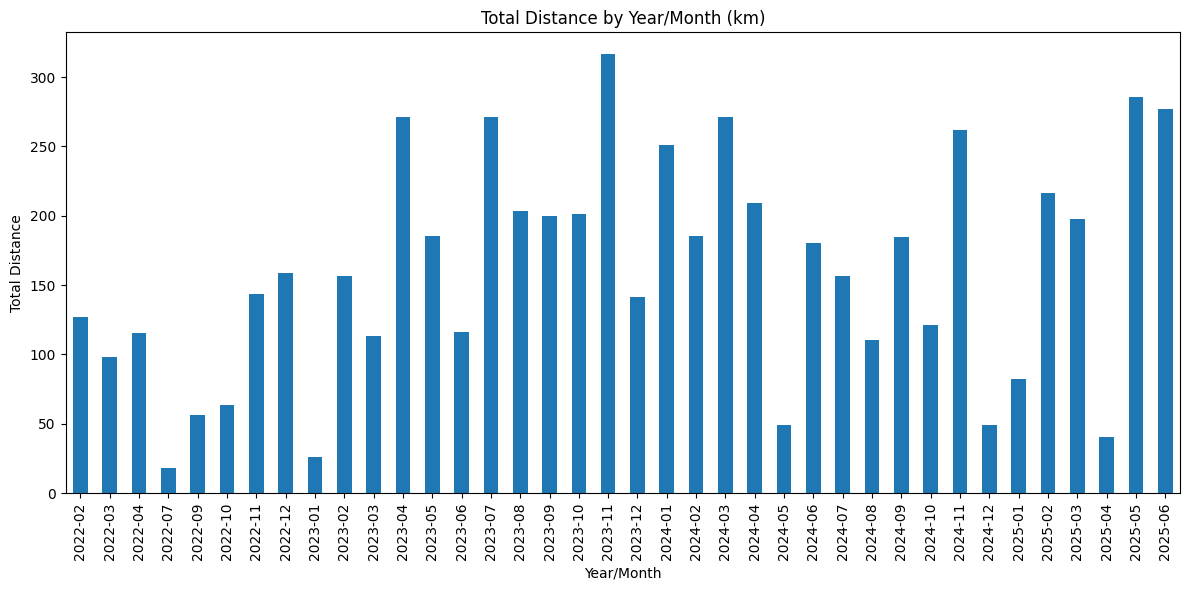

In [38]:
df_ride['YearMonth'] = df_ride['Activity Date'].dt.to_period('M')
df_ride.groupby('YearMonth')['Distance'].sum().plot(kind='bar', figsize=(12, 6), title='Total Distance by Year/Month (km)')
plt.xlabel('Year/Month')
plt.ylabel('Total Distance')
plt.tight_layout()
plt.show()

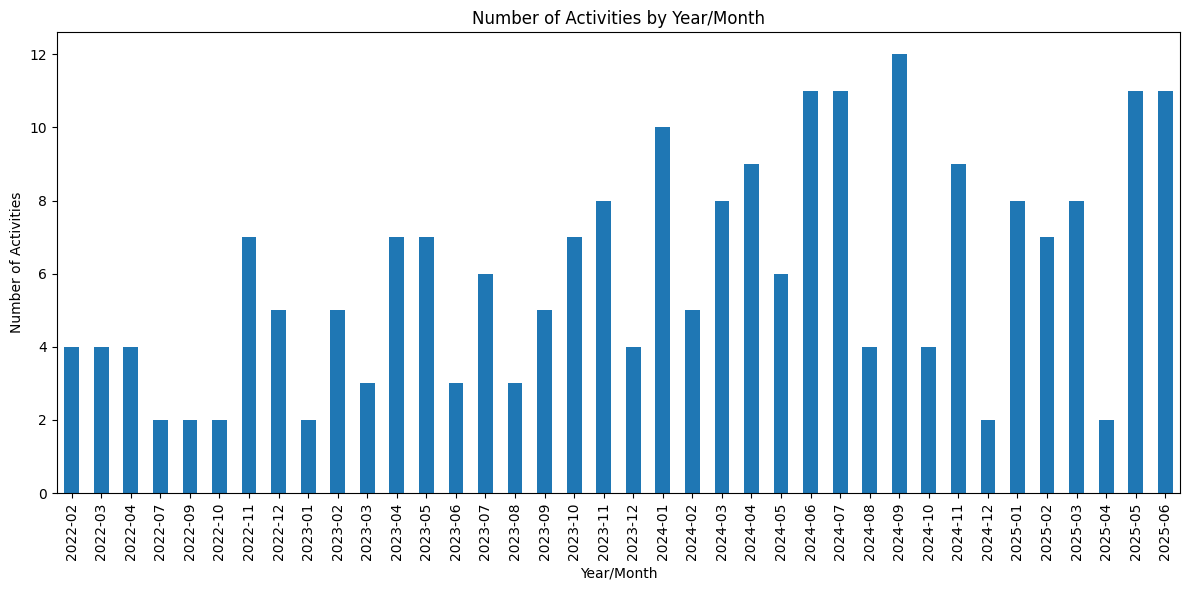

In [39]:
df_ride.groupby('YearMonth')['Activity ID'].count().plot(kind='bar', figsize=(12, 6), title='Number of Activities by Year/Month')
plt.xlabel('Year/Month')
plt.ylabel('Number of Activities')
plt.tight_layout()
plt.show()

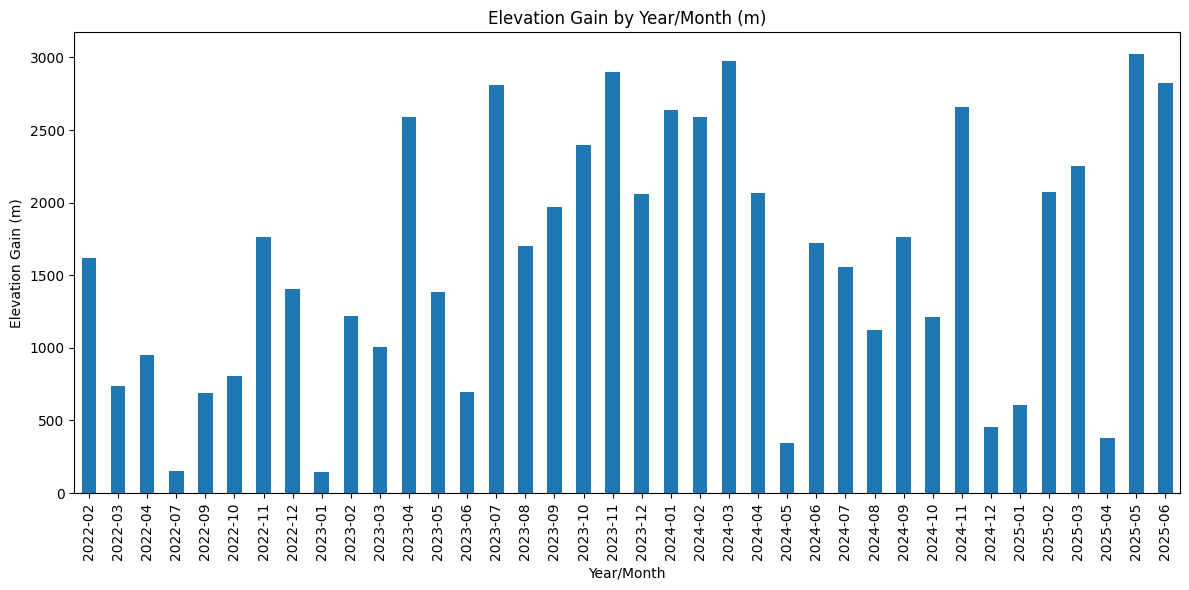

In [41]:
df_ride.groupby('YearMonth')['Elevation Gain'].sum().plot(kind='bar', figsize=(12, 6), title='Elevation Gain by Year/Month (m)')
plt.xlabel('Year/Month')
plt.ylabel('Elevation Gain (m)')
plt.tight_layout()
plt.show()

In [44]:
df_max_hart_rate = df_ride[df_ride['Max Heart Rate'].notnull()]

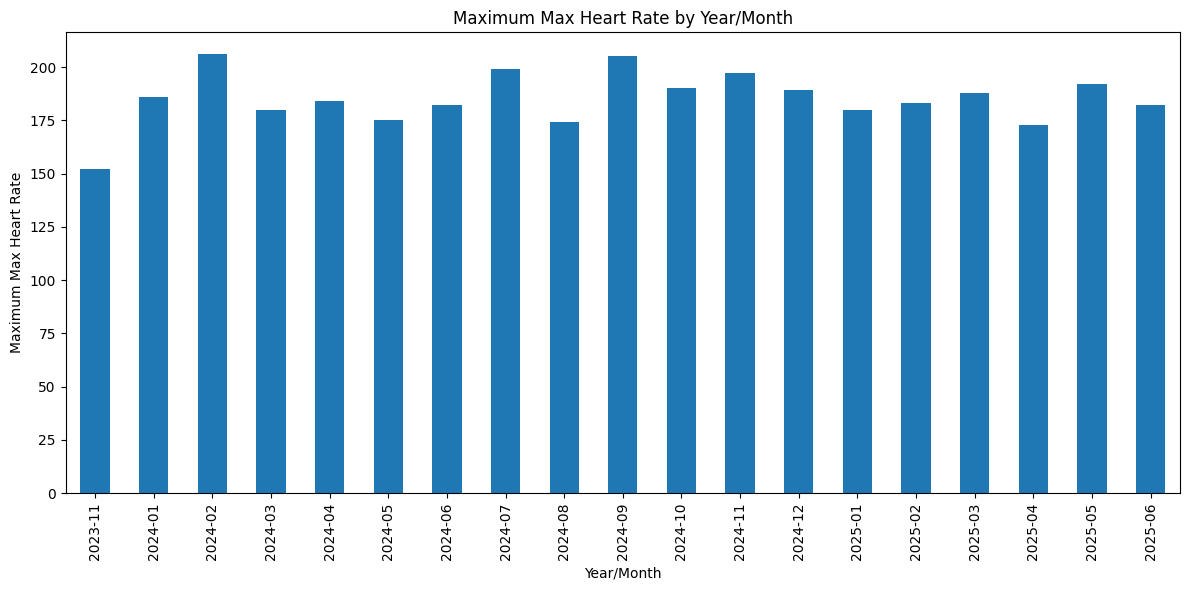

In [46]:
df_max_hart_rate.groupby('YearMonth')['Max Heart Rate'].max().plot(kind='bar', figsize=(12, 6), title='Maximum Max Heart Rate by Year/Month')
plt.xlabel('Year/Month')
plt.ylabel('Maximum Max Heart Rate')
plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17436\2097965843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_max_hart_rate['YearSemester'] = df_ride['Activity Date'].dt.to_period('2Q')


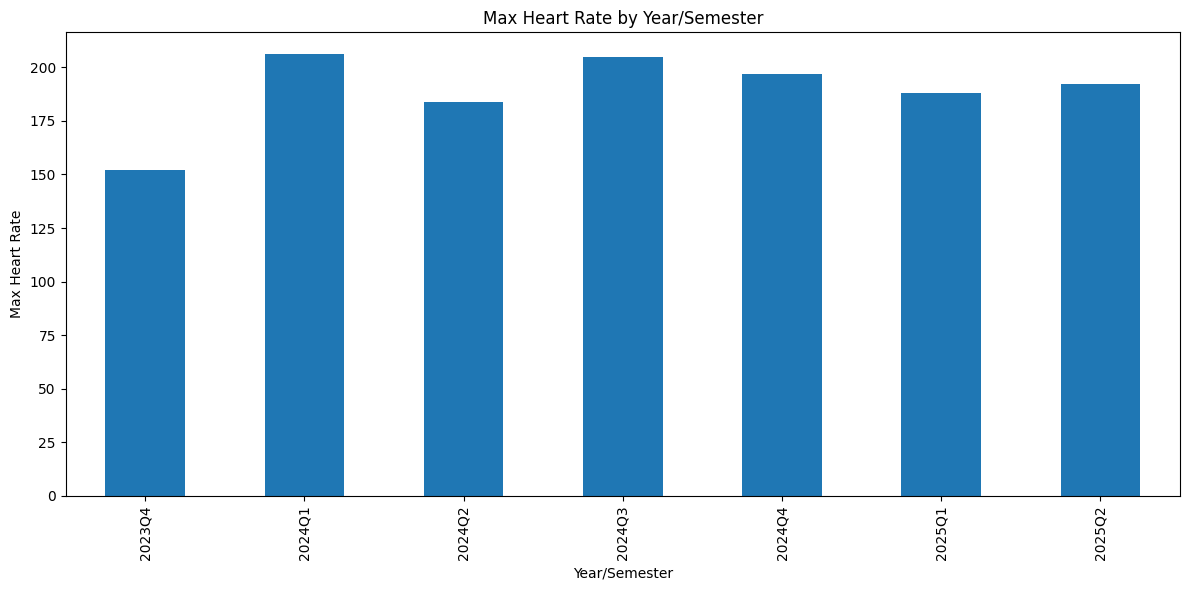

In [48]:
df_max_hart_rate['YearSemester'] = df_ride['Activity Date'].dt.to_period('2Q')
df_max_hart_rate.groupby('YearSemester')['Max Heart Rate'].max().plot(kind='bar', figsize=(12, 6), title='Max Heart Rate by Year/Semester')
plt.xlabel('Year/Semester')
plt.ylabel('Max Heart Rate')
plt.tight_layout()
plt.show()

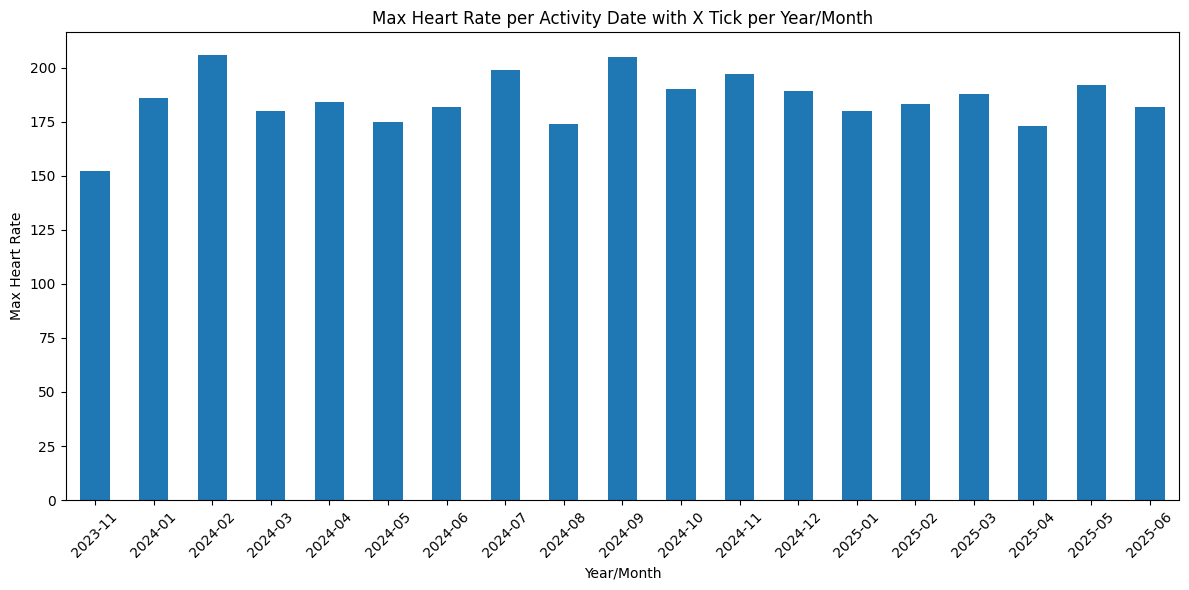

In [51]:
df_max_hart_rate.groupby(df_max_hart_rate['Activity Date'].dt.to_period('M'))['Max Heart Rate'].max().plot(
    kind='bar', figsize=(12, 6), title='Max Heart Rate per Activity Date with X Tick per Year/Month')
plt.xticks(rotation=45)
plt.xlabel('Year/Month')
plt.ylabel('Max Heart Rate')
plt.tight_layout()
plt.show()

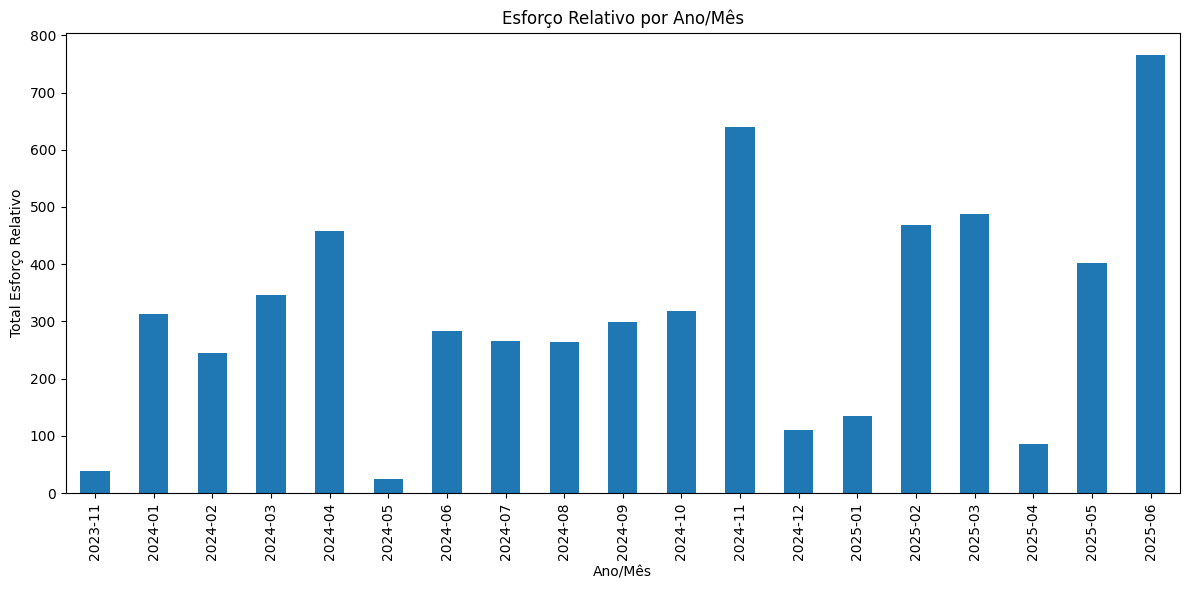

In [61]:
df_max_hart_rate.groupby('YearMonth')['Relative Effort'].sum().plot(kind='bar', figsize=(12, 6), title='Esforço Relativo por Ano/Mês')
plt.xlabel('Ano/Mês')
plt.ylabel('Total Esforço Relativo')
plt.tight_layout()
plt.show()

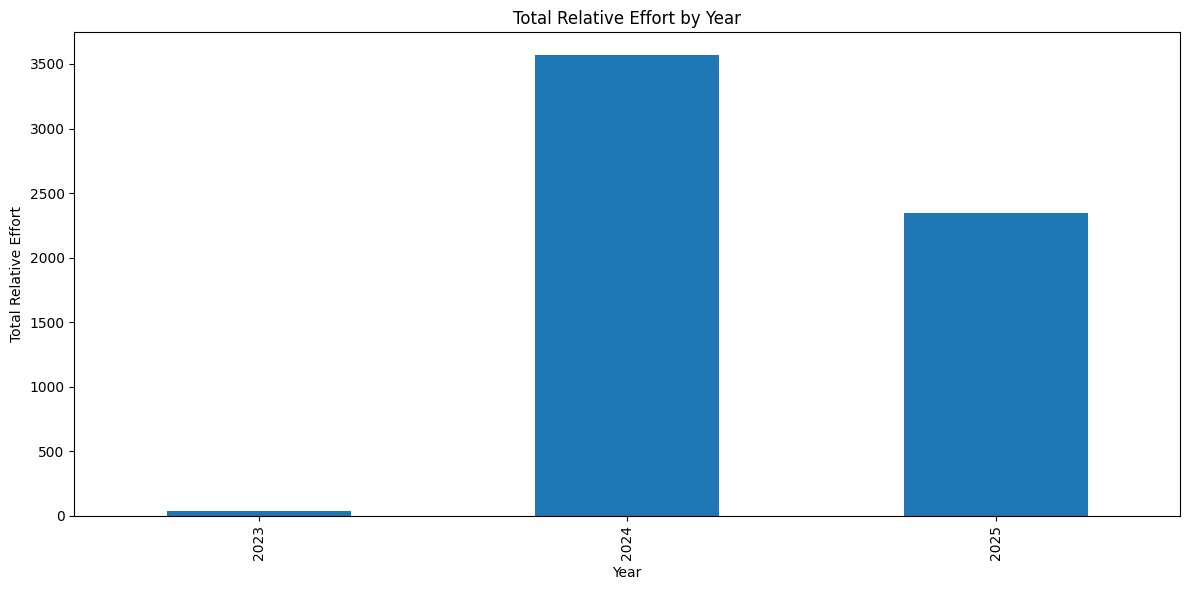

In [54]:
df_max_hart_rate.groupby(df_max_hart_rate['Activity Date'].dt.year)['Relative Effort'].sum().plot(kind='bar', figsize=(12, 6), title='Total Relative Effort by Year')
plt.xlabel('Year')
plt.ylabel('Total Relative Effort')
plt.tight_layout()
plt.show()

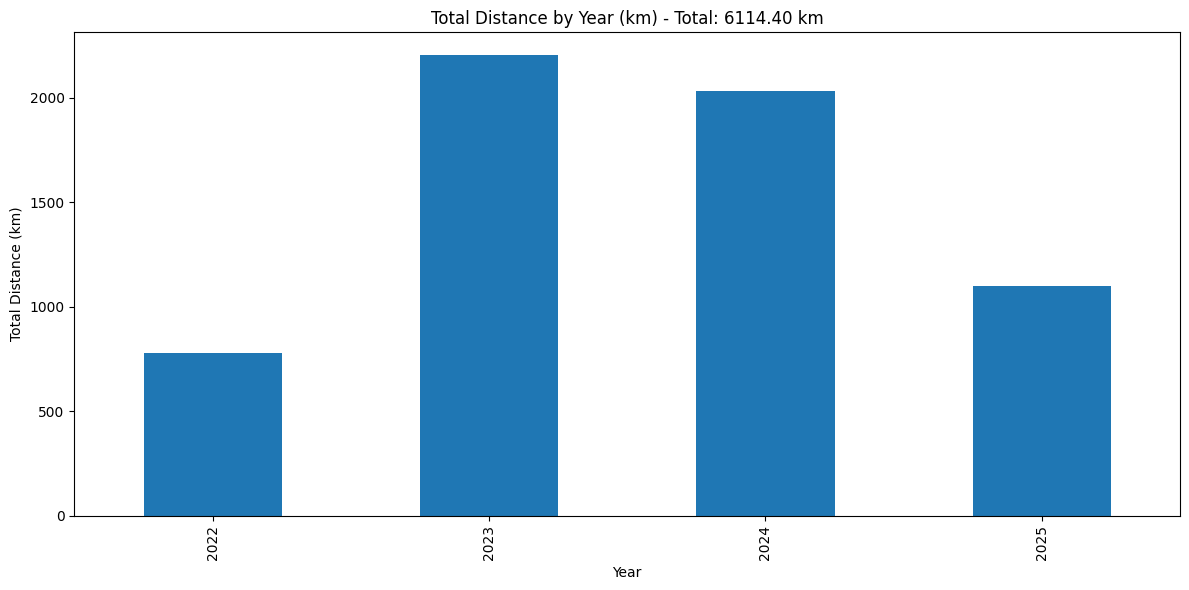

In [58]:
total_distance = df_ride['Distance'].sum()
df_ride.groupby(df_ride['Activity Date'].dt.year)['Distance'].sum().plot(
    kind='bar', figsize=(12, 6), title=f'Total Distance by Year (km) - Total: {total_distance:.2f} km'
)
plt.xlabel('Year')
plt.ylabel('Total Distance (km)')
plt.tight_layout()
plt.show()

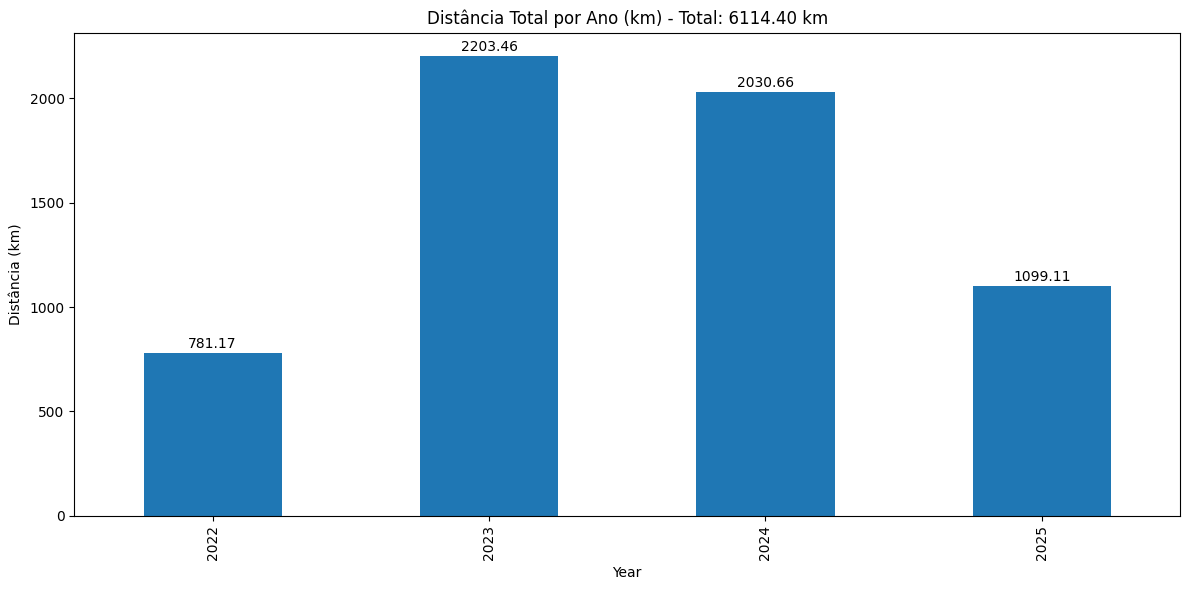

In [62]:
distance_by_year = df_ride.groupby(df_ride['Activity Date'].dt.year)['Distance'].sum()
total_distance = distance_by_year.sum()

ax = distance_by_year.plot(kind='bar', figsize=(12, 6),
                           title=f"Distância Total por Ano (km) - Total: {total_distance:.2f} km")
plt.xlabel('Year')
plt.ylabel('Distância (km)')

for i, v in enumerate(distance_by_year):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [63]:
df_ride[df_ride['Activity Date'].dt.year == 2025].to_excel(r"D:\Atrium\Projects\Strava\data\activities2025.xlsx", index=False)

47

In [69]:

df_ride.to_excel(r"D:\Atrium\Projects\Strava\data\activities.xlsx", index=False)


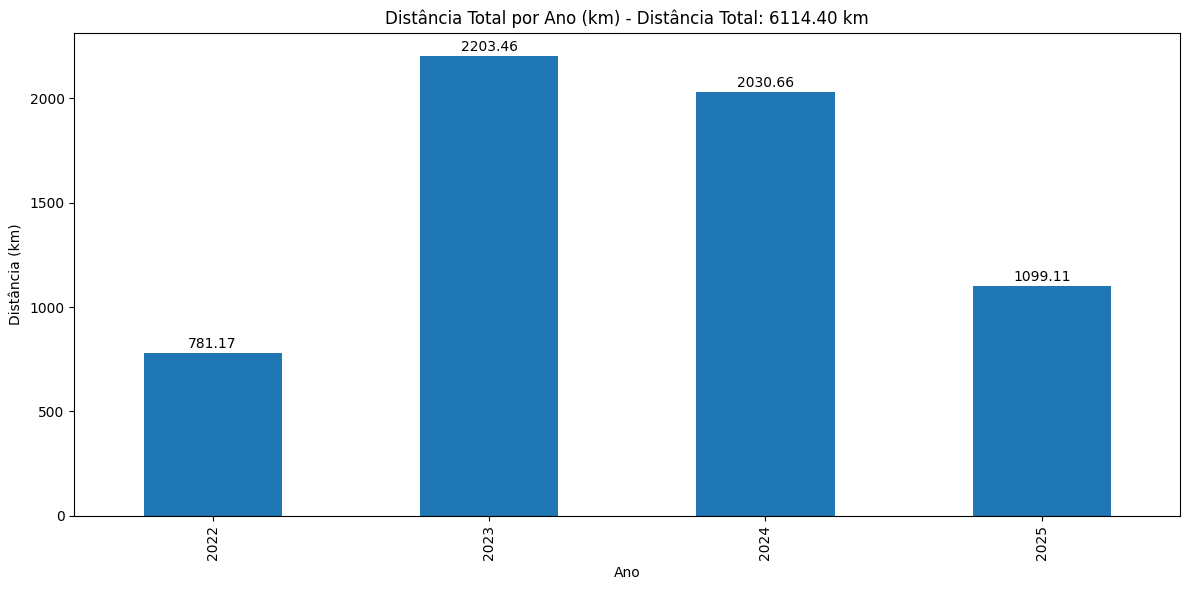

In [71]:
distance_by_year = df_ride.groupby(df_ride['Activity Date'].dt.year)['Distance'].sum()
total_distance = distance_by_year.sum()

ax = distance_by_year.plot(kind='bar', figsize=(12, 6),
                           title=f"Distância Total por Ano (km) - Distância Total: {total_distance:.2f} km")
plt.xlabel('Ano')
plt.ylabel('Distância (km)')

for i, v in enumerate(distance_by_year):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

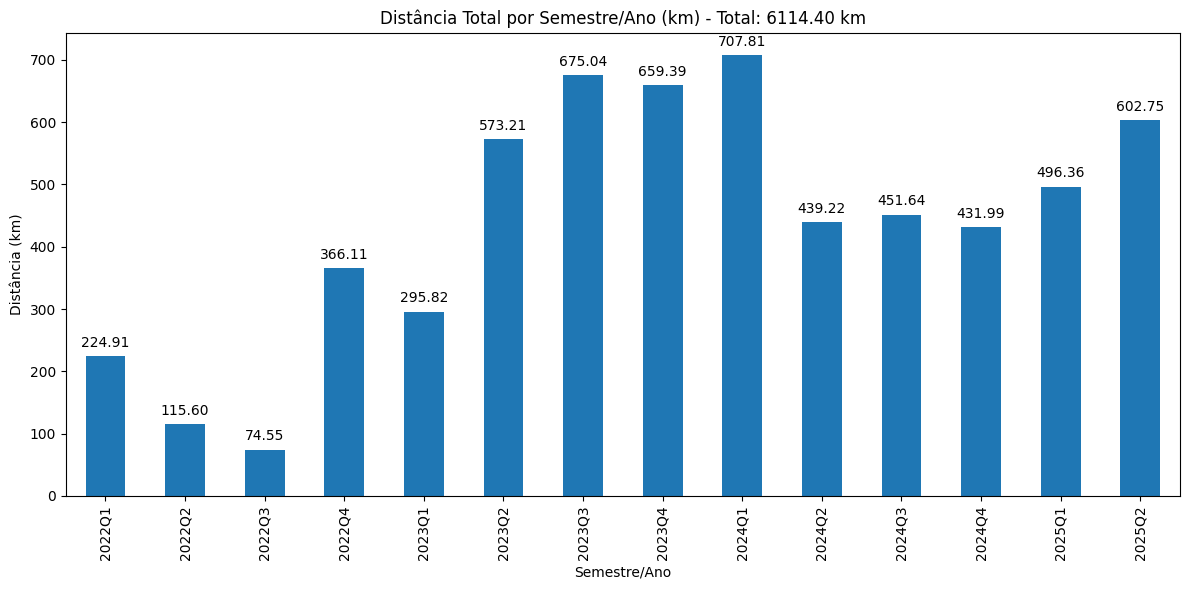

In [72]:
df_ride['YearSemester'] = df_ride['Activity Date'].dt.to_period('2Q')
distance_by_semester = df_ride.groupby('YearSemester')['Distance'].sum()
total_distance = distance_by_semester.sum()

ax = distance_by_semester.plot(kind='bar', figsize=(12, 6),
                               title=f"Distância Total por Semestre/Ano (km) - Total: {total_distance:.2f} km")
plt.xlabel('Semestre/Ano')
plt.ylabel('Distância (km)')

for i, v in enumerate(distance_by_semester):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

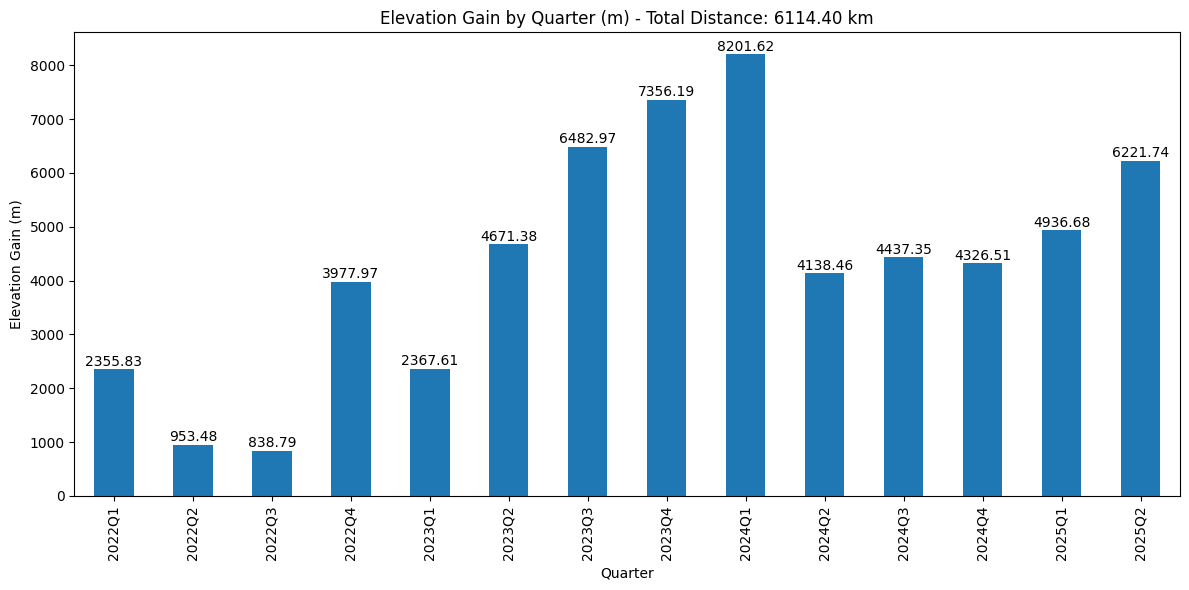

In [73]:
df_ride['Quarter'] = df_ride['Activity Date'].dt.to_period('Q')
elevation_by_quarter = df_ride.groupby('Quarter')['Elevation Gain'].sum()
total_distance = df_ride['Distance'].sum()

ax = elevation_by_quarter.plot(kind='bar', figsize=(12, 6),
                               title=f"Elevation Gain by Quarter (m) - Total Distance: {total_distance:.2f} km")
plt.xlabel('Quarter')
plt.ylabel('Elevation Gain (m)')

for i, v in enumerate(elevation_by_quarter):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

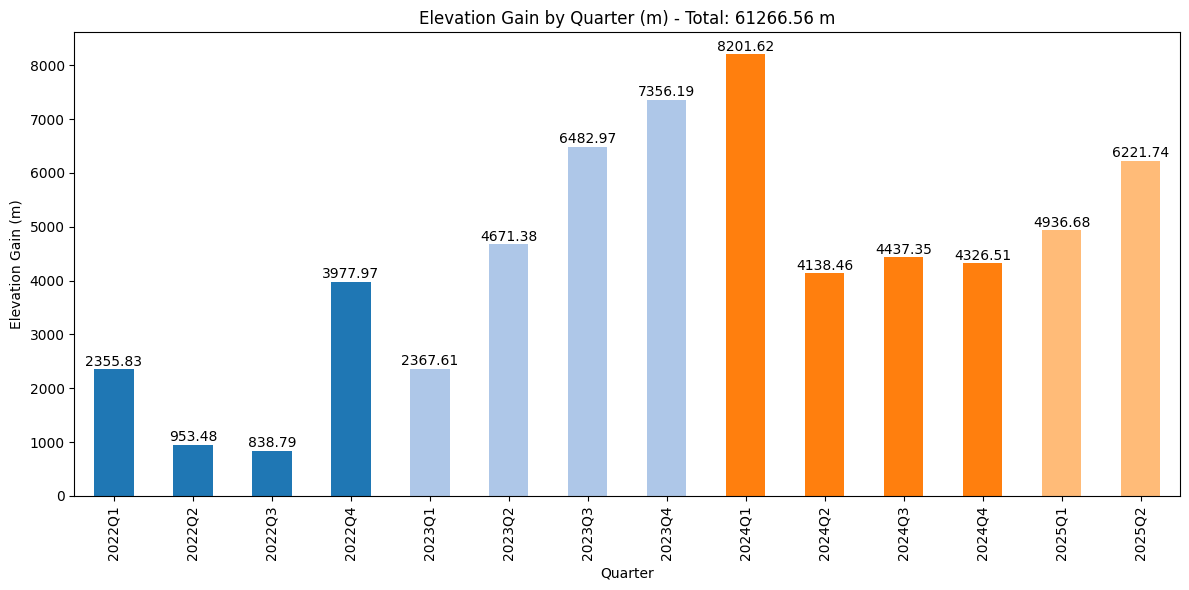

In [75]:
import seaborn as sns

df_ride['Quarter'] = df_ride['Activity Date'].dt.to_period('Q')
elevation_by_quarter = df_ride.groupby('Quarter')['Elevation Gain'].sum()
total_elevation = elevation_by_quarter.sum()

palette = sns.color_palette("tab20", len(elevation_by_quarter.index.year.unique()))
colors = [palette[y - elevation_by_quarter.index.year.min()] for y in elevation_by_quarter.index.year]

ax = elevation_by_quarter.plot(kind='bar', color=colors, figsize=(12, 6),
                               title=f"Elevation Gain by Quarter (m) - Total: {total_elevation:.2f} m")
plt.xlabel('Quarter')
plt.ylabel('Elevation Gain (m)')

for i, v in enumerate(elevation_by_quarter):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

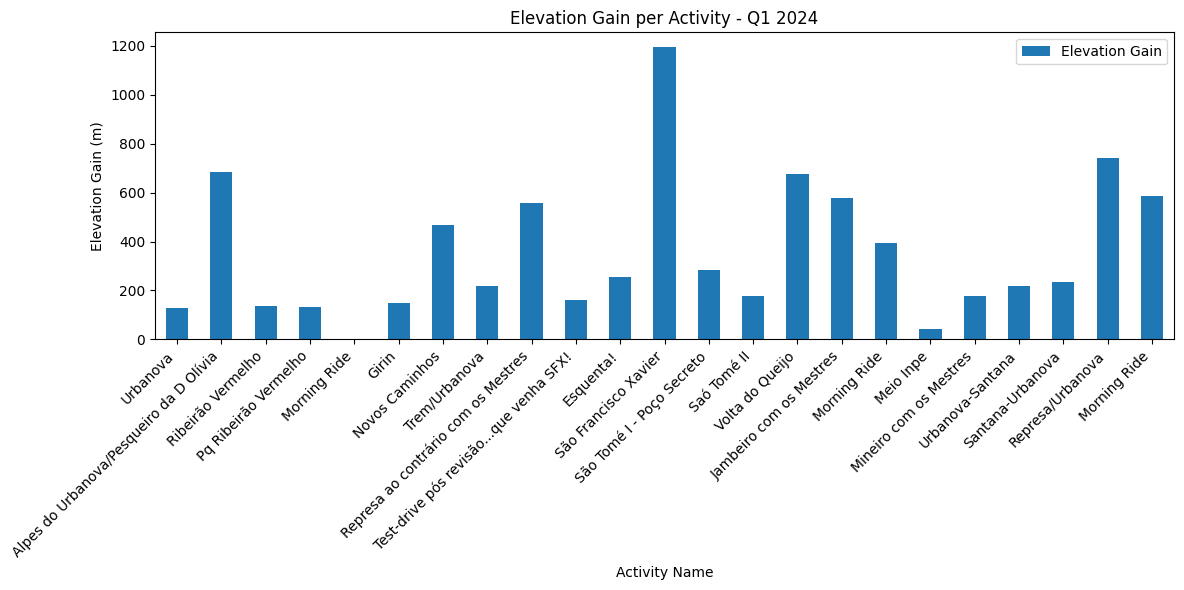

In [76]:
df_2024_q1 = df_ride[(df_ride['Activity Date'].dt.to_period('Q') == '2024Q1')]
df_2024_q1.plot.bar(x='Activity Name', y='Elevation Gain', figsize=(12, 6), title='Elevation Gain per Activity - Q1 2024')
plt.xlabel('Activity Name')
plt.ylabel('Elevation Gain (m)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

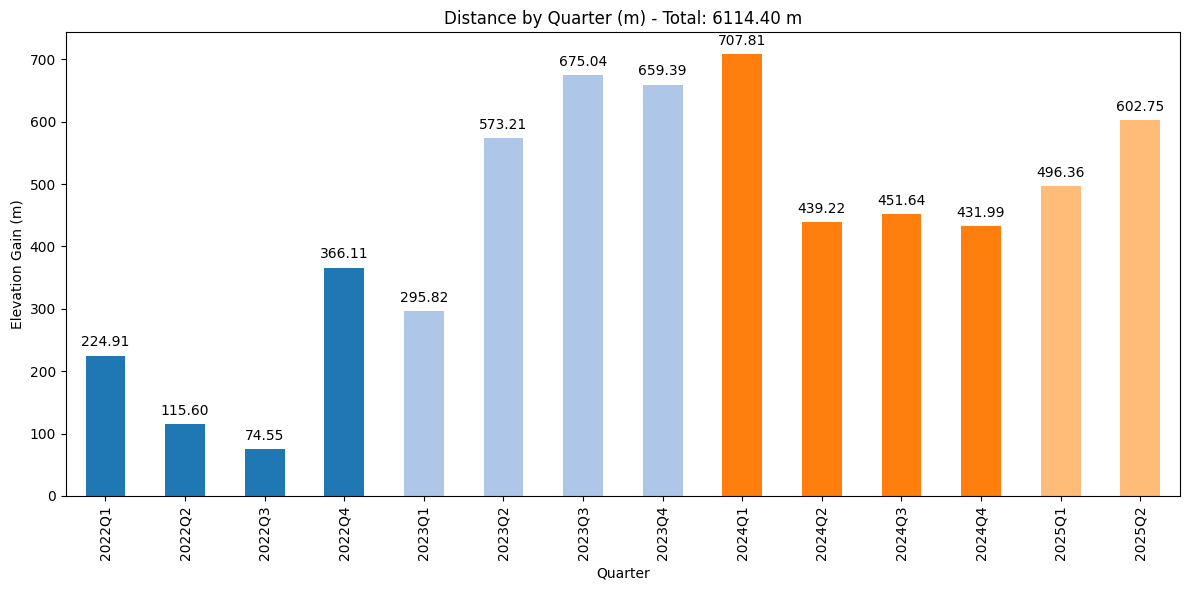

In [77]:
import seaborn as sns

df_ride['Quarter'] = df_ride['Activity Date'].dt.to_period('Q')
elevation_by_quarter = df_ride.groupby('Quarter')['Distance'].sum()
total_elevation = elevation_by_quarter.sum()

palette = sns.color_palette("tab20", len(elevation_by_quarter.index.year.unique()))
colors = [palette[y - elevation_by_quarter.index.year.min()] for y in elevation_by_quarter.index.year]

ax = elevation_by_quarter.plot(kind='bar', color=colors, figsize=(12, 6),
                               title=f"Distance by Quarter (m) - Total: {total_elevation:.2f} m")
plt.xlabel('Quarter')
plt.ylabel('Elevation Gain (m)')

for i, v in enumerate(elevation_by_quarter):
    ax.text(i, v + 10, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()